<a href="https://colab.research.google.com/github/carlosegn/proyecciones-ventas-alimenticias/blob/main/Proyeccion_ventas_alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO: Proyecto de proyección de ventas alimenticias**
## Creado por: Carlos Guerrero

* Fecha creado: 16/02/2023
* Fecha actualización: 25/03/2023
* Descripción: Proyección de ventas para productos alimenticios vendidos en diversas tiendas.

In [1]:
import pandas as pd
archivo = '/content/drive/MyDrive/CodingDojo/sales_predictions.csv'
df = pd.read_csv(archivo)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploración y limpieza de los datos

In [2]:
# Filas y columas que tiene el dataframe
df.shape

(8523, 12)

In [3]:
# Información de cada variable (columna)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Limpieza de duplicados
df.duplicated().sum()

0

No existen valores duplicados

In [5]:
# Identificar valores faltantes
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Se observan varios registros faltantes en las variables de peso del producto (Item_Weight) y tamaño de la tienda (Outlet_Size)

### Análisis de variable Outlet_Size

In [6]:
# Valores de la variable Outlet_Size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
num_missing = df['Outlet_Size'].isna().sum()

total_rows = df.shape[0]

percent_missing = (num_missing / total_rows)*100
print(f'{percent_missing:.2f}% de los valores son nulos')

28.28% de los valores son nulos


Observamos que casi el 30% de los valores de la variable Outlet_Size son nulos, y es una variable categórica que sólo tiene 3 valores (Medium, Small o High) por lo que imputar un valor por frecuencia o con una constante ingresaría muchos errores a nuestro análisis, por lo que lo mejor es eliminar dicha columna.

In [8]:
df_final = df.drop(columns='Outlet_Size')
df_final.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.138


### Análisis de variable Item_Weight

In [9]:
# Valores de la variable Item_Weight
df_final['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [10]:
# Valores de la variable Item_Identifier
df_final['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
# Observar valores únicos en cada variable
df_final.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
# Relación entre Item_Weight e Item_Identifier
df_final.groupby(['Item_Identifier'])['Item_Weight'].count()

Item_Identifier
DRA12    6
DRA24    5
DRA59    6
DRB01    2
DRB13    5
        ..
NCZ30    6
NCZ41    5
NCZ42    5
NCZ53    4
NCZ54    5
Name: Item_Weight, Length: 1559, dtype: int64

**Análisis**  
De acuerdo a los datos, todos los Item_Identifier se corresponden con un Item_Weight, por lo que podríamos imputar los valores faltantes en Item_Weight consultando los valores de Item_Identifier e imputando un valor conocido que se obtenga de otro registro

In [13]:
# Obtener los Item_Identifier con valores de Item_Weight NaN
filtro_item_weight = df_final['Item_Weight'].isna()
df_final[filtro_item_weight]['Item_Identifier']

7       FDP10
18      DRI11
21      FDW12
23      FDC37
29      FDC14
        ...  
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, Length: 1463, dtype: object

In [14]:
# El filtro nos da un valor de tipo de series de Panda, por lo que podemos iterar en los items de la serie
type(df_final[filtro_item_weight]['Item_Identifier'])

pandas.core.series.Series

In [15]:
# Iteramos por la serie de valores que tienen un valor NaN en Item_Weight
for index, value in df_final[filtro_item_weight]['Item_Identifier'].iteritems():
  
  # Creamos un filtro para cada valor de Item_Identifier
  filtro_id = df_final['Item_Identifier'] == value

  # Guardamos el peso máximo para ese Item_Identifier, funciona con mean() o min() también ya que son valores únicos
  peso = df_final[filtro_id]['Item_Weight'].max()

  # Cambiamos el valor en el indice obtenido de la serie y en el atributo Item_Weight
  df_final.at[index, 'Item_Weight'] = peso

In [16]:
# Confirmamos si quedan valores nulos
df_final.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Todavía quedan 4 registros con Item_Weight NaN, esto debido a que no existía ningún otro registro con un Item_Identifier igual, por lo que voy a eliminar estos registros ya que representan menos del 0.05% de los datos

In [17]:
df_final.dropna(inplace=True)
df_final.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

La base de datos ya no tiene valores faltantes.

### Encontrar y resolver categorías inconsistentes

In [18]:
df_final.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.138


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Location_Type       8519 non-null   object 
 9   Outlet_Type                8519 non-null   object 
 10  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 798.7+ KB


In [20]:
# Revisar categorías en valores Item_Fat_Content, Item_Type, Outlet_Identifier
# El resto de columnas ya se revisaron anteriormente sin encontrar inconsistencias
df_final['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
df_final['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [22]:
df_final['Outlet_Identifier'].value_counts()

OUT013    932
OUT027    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: Outlet_Identifier, dtype: int64

Las columnas Item_Type y Outlet_Identifier parecen tener información correcta, la columna Item_Fat_Content tiene categorías que se pueden corregir.

In [23]:
# Corregir categorías inconsistentes en Item_Fat_Content
df_final['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
df_final['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
df_final['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
df_final['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

### Valores sumarizados para columnas numéricas

In [24]:
df_final.describe().loc[['min', 'max', 'mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800
mean,12.87542,0.066112,141.010019,1997.837892,2181.188779


Se muestran los valores minimos, máximos y media de todas las columnas numéricas.

## Análisis estadístico

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Definir estilo y paletas para todos los gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('tab10')

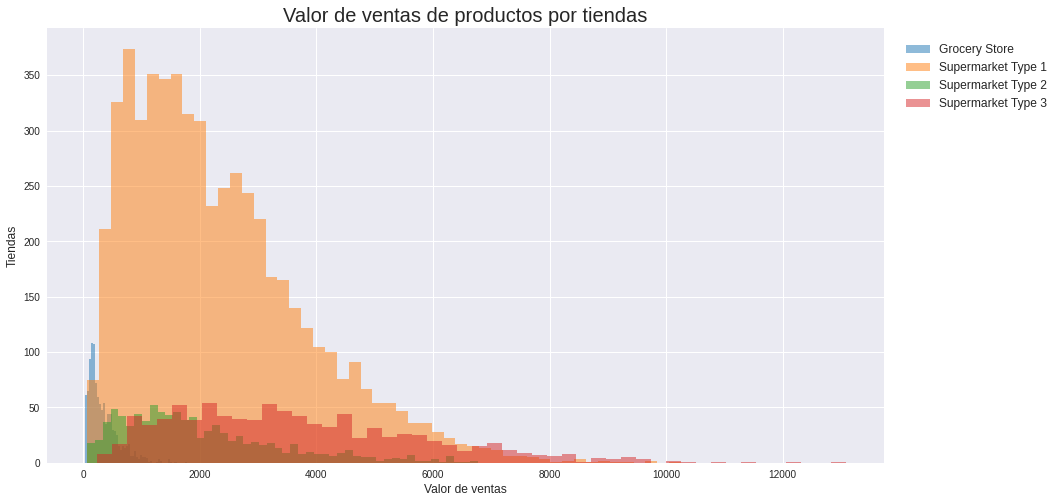

In [32]:
# Total de ventas de items por supermercado
# Creo nuevos DF para cada tipo de supermercado
df_grocery = df_final.loc[df_final['Outlet_Type'] == 'Grocery Store']
df_supermarket1 = df_final.loc[df_final['Outlet_Type'] == 'Supermarket Type1']
df_supermarket2 = df_final.loc[df_final['Outlet_Type'] == 'Supermarket Type2']
df_supermarket3 = df_final.loc[df_final['Outlet_Type'] == 'Supermarket Type3']

# Mostrar los gráficos
plt.figure(figsize=(15,8))
plt.hist(df_grocery['Item_Outlet_Sales'].values, alpha=0.5, label='Grocery Store', bins=50)
plt.hist(df_supermarket1['Item_Outlet_Sales'].values, alpha=0.5, label='Supermarket Type 1', bins=50)
plt.hist(df_supermarket2['Item_Outlet_Sales'].values, alpha=0.5, label='Supermarket Type 2', bins=50)
plt.hist(df_supermarket3['Item_Outlet_Sales'].values, alpha=0.5, label='Supermarket Type 3', bins=50)
plt.title('Valor de ventas de productos por tiendas', fontsize=20)
plt.legend(loc=(1.02,0.80), fontsize=12)
plt.xlabel('Valor de ventas', fontsize=12)
plt.ylabel('Tiendas', fontsize=12)
plt.savefig('Valor_ventas_productos_tiendas.png', dpi=300)
plt.show()

Podemos observar que existen más tiendas de tipo Supermarket Type 1 y que el valor de ventas de Items se concentra hasta valores de 6000, en cambio las tiendas de tipo Supermarket Type 3, son menos pero sus ventas de Items son más altas.

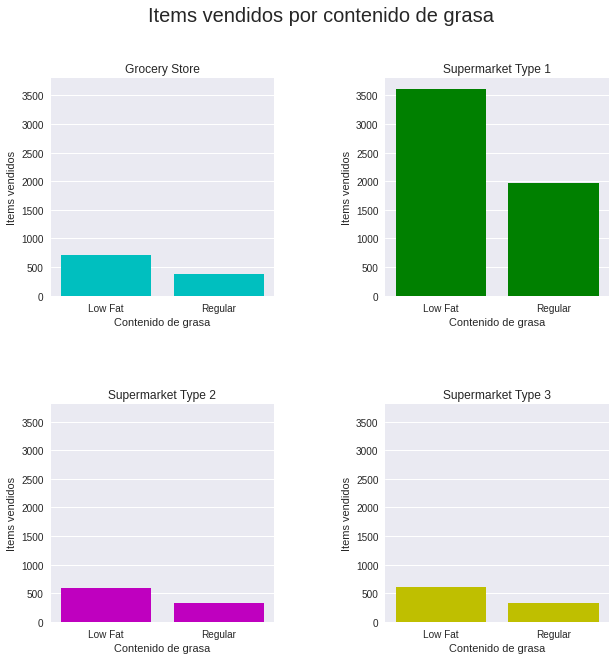

In [33]:
# Items vendidos por contenido de grasa
# Obtenemos los valores de items vendidos por tienda
grocery_fat = df_grocery['Item_Fat_Content'].value_counts()
supermarket1_fat = df_supermarket1['Item_Fat_Content'].value_counts()
supermarket2_fat = df_supermarket2['Item_Fat_Content'].value_counts()
supermarket3_fat = df_supermarket3['Item_Fat_Content'].value_counts()

# 4 gráficos de barras con los valores
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Grafico Grocery Store
axes[0,0].bar(grocery_fat.index, grocery_fat.values, label='Grocery', color='c')
axes[0,0].set_xlabel('Contenido de grasa')
axes[0,0].set_ylabel('Items vendidos')
axes[0,0].set_ylim(bottom=0, top=3800)
axes[0,0].grid(axis='x')
axes[0,0].set_title('Grocery Store')

# Grafico Supermarket 1
axes[0,1].bar(supermarket1_fat.index, supermarket1_fat.values, color='g')
axes[0,1].set_xlabel('Contenido de grasa')
axes[0,1].set_ylabel('Items vendidos')
axes[0,1].set_ylim(bottom=0, top=3800)
axes[0,1].grid(axis='x')
axes[0,1].set_title('Supermarket Type 1')

# Grafico Supermarket 2
axes[1,0].bar(supermarket2_fat.index, supermarket2_fat.values, color='m')
axes[1,0].set_xlabel('Contenido de grasa')
axes[1,0].set_ylabel('Items vendidos')
axes[1,0].set_ylim(bottom=0, top=3800)
axes[1,0].grid(axis='x')
axes[1,0].set_title('Supermarket Type 2')

# Grafico Supermarket 3
axes[1,1].bar(supermarket3_fat.index, supermarket3_fat.values, color='y')
axes[1,1].set_xlabel('Contenido de grasa')
axes[1,1].set_ylabel('Items vendidos')
axes[1,1].set_ylim(bottom=0, top=3800)
axes[1,1].grid(axis='x')
axes[1,1].set_title('Supermarket Type 3')

fig.suptitle('Items vendidos por contenido de grasa', fontsize=20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig('Items_vendidos_contenido_grasa.png', dpi=300)
plt.show();

Podemos observar que los items bajos en grasa son mas vendidos que los regulares en todas las tiendas, siendo el tipo de tienda Supermarket Type 1 en el que más ventas existen.

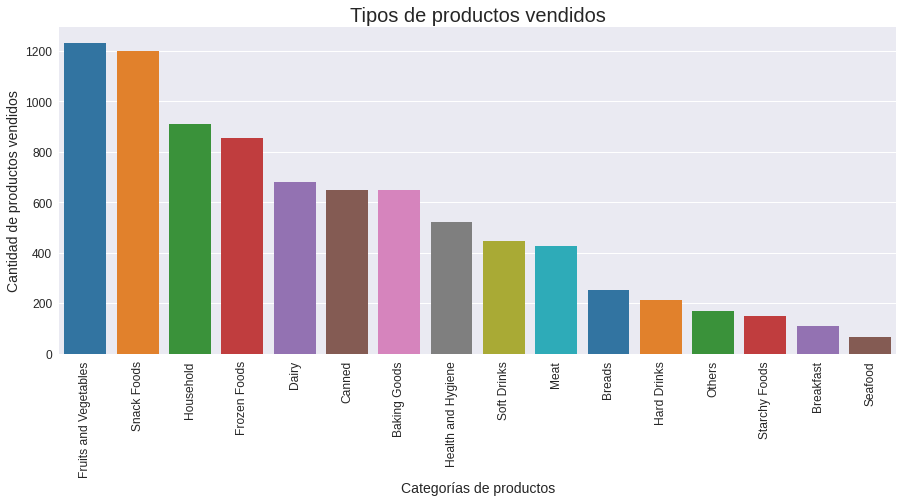

In [40]:
# Tipos de Items vendidos
cantidad_items_vendidos = df_final.Item_Type.value_counts()
plt.figure(figsize=(15,6))
plt.grid(axis='x')
sns.barplot(x=cantidad_items_vendidos.index, y=cantidad_items_vendidos.values, palette='tab10')
plt.title('Tipos de productos vendidos', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Categorías de productos', fontsize=14)
plt.ylabel('Cantidad de productos vendidos', fontsize=14)
plt.savefig('Tipos_productos_vendidos.png', dpi=300)
plt.show()

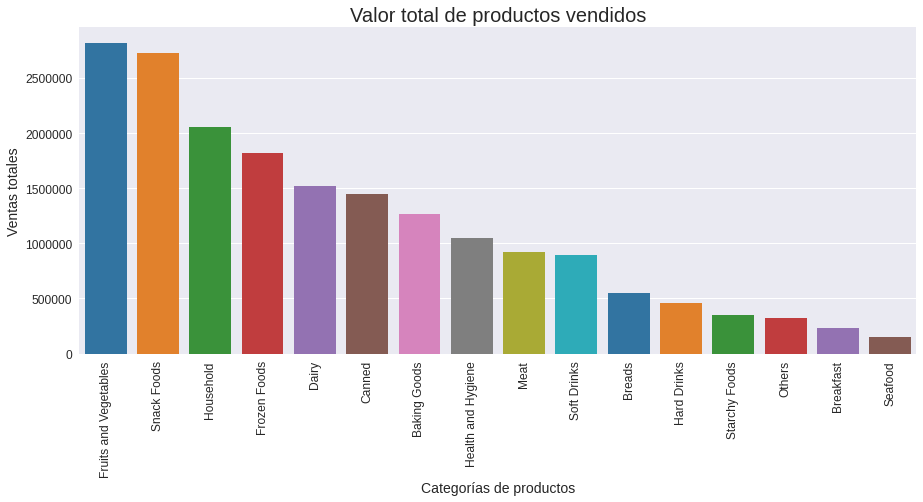

In [41]:
# Grafico de total de ventas por tipo de producto
productos_vendidos = df_final.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.grid(axis='x')
sns.barplot(x=productos_vendidos.index, y=productos_vendidos.values, palette='tab10')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Valor total de productos vendidos', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Categorías de productos', fontsize=14)
plt.ylabel('Ventas totales', fontsize=14)
plt.savefig('Valor_total_productos_vendidos.png', dpi=300)
plt.show()

En los gráficos anteriores podemos observar que las "Frutas y vegetales" y los "Snacks" son los dos tipos de productos más vendidos, tanto en cantidad como en valor de venta.

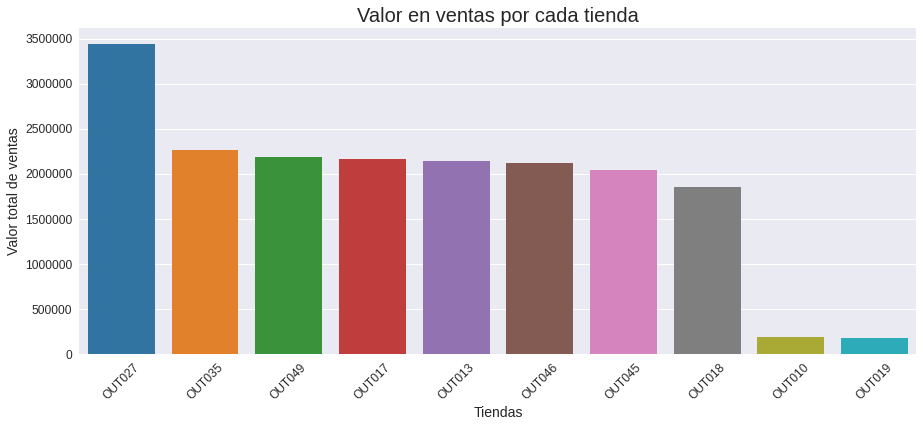

In [44]:
# Estadisticas de ventas por tienda
ventas_tienda = df_final.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=ventas_tienda.index, y=ventas_tienda.values, palette='tab10')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Valor en ventas por cada tienda', fontsize=20)
plt.xlabel('Tiendas', fontsize=14)
plt.ylabel('Valor total de ventas', fontsize=14)
plt.savefig('Valor_ventas_por_tienda.png', dpi=300)
plt.show()

En este gráfico podemos observar cuales son las tiendas que han vendido más, siendo la tienda con identificador OUT027 la que más ha vendido llegando a ventas de 3.5 Millones.

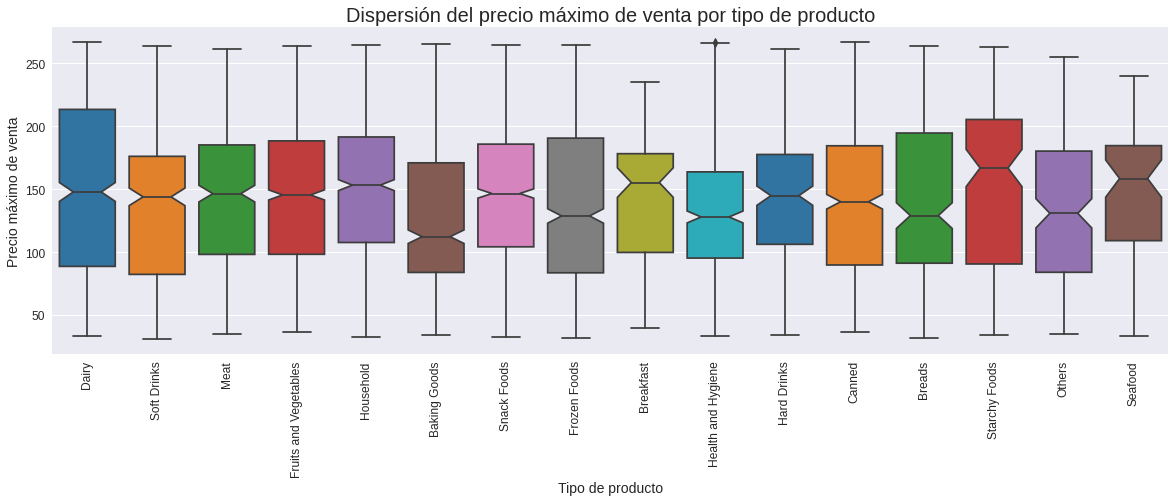

In [45]:
# Análisis de la variable MRP (Maximum Retail Price - Precio máximo de venta)
plt.figure(figsize=(20,6))
sns.boxplot(x='Item_Type', y='Item_MRP', data=df_final, notch=True, palette='tab10')
plt.title('Dispersión del precio máximo de venta por tipo de producto', fontsize=20)
plt.xlabel('Tipo de producto', fontsize=14)
plt.ylabel('Precio máximo de venta', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Precio_maximo_venta_producto.png', dpi=300)
plt.show()

Este gráfico nos permite observar la variación del precio máximo de venta (MRP) por cada tipo de producto, podemos observar que casi no existen valores atípicos y que existe una variación del MRP relativamente alta en casi todos los tipos de productos.

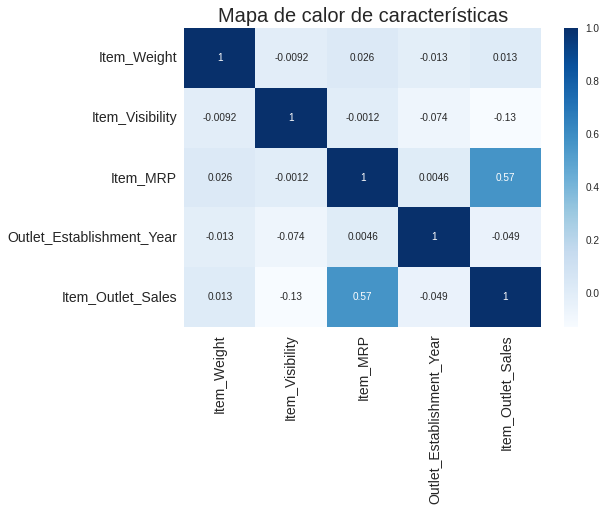

In [47]:
# Mapa de calor de correlación de características
corr = df_final.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title('Mapa de calor de características', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Mapa_calor.png', dpi=300)
plt.show()

Podemos observar que existe una correlacción positiva moderada entre el precio máximo de venta (Item_MRP) y el valor de las ventas de los items en los Outles (Item_Outlet_Sales), es decir que a mayor precio del producto mayor valor en ventas se tiene.